In [118]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import sklearn as sk
import seaborn as sns

In [119]:
# convert the data from files format into dataframe

# ! pip install pyreadstat

1. Data Acquisition 

In [120]:
# Read data from CSV file 

dataset = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [121]:
dataset.drop(columns='id', inplace=True)

In [122]:
dataset.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type

In [123]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

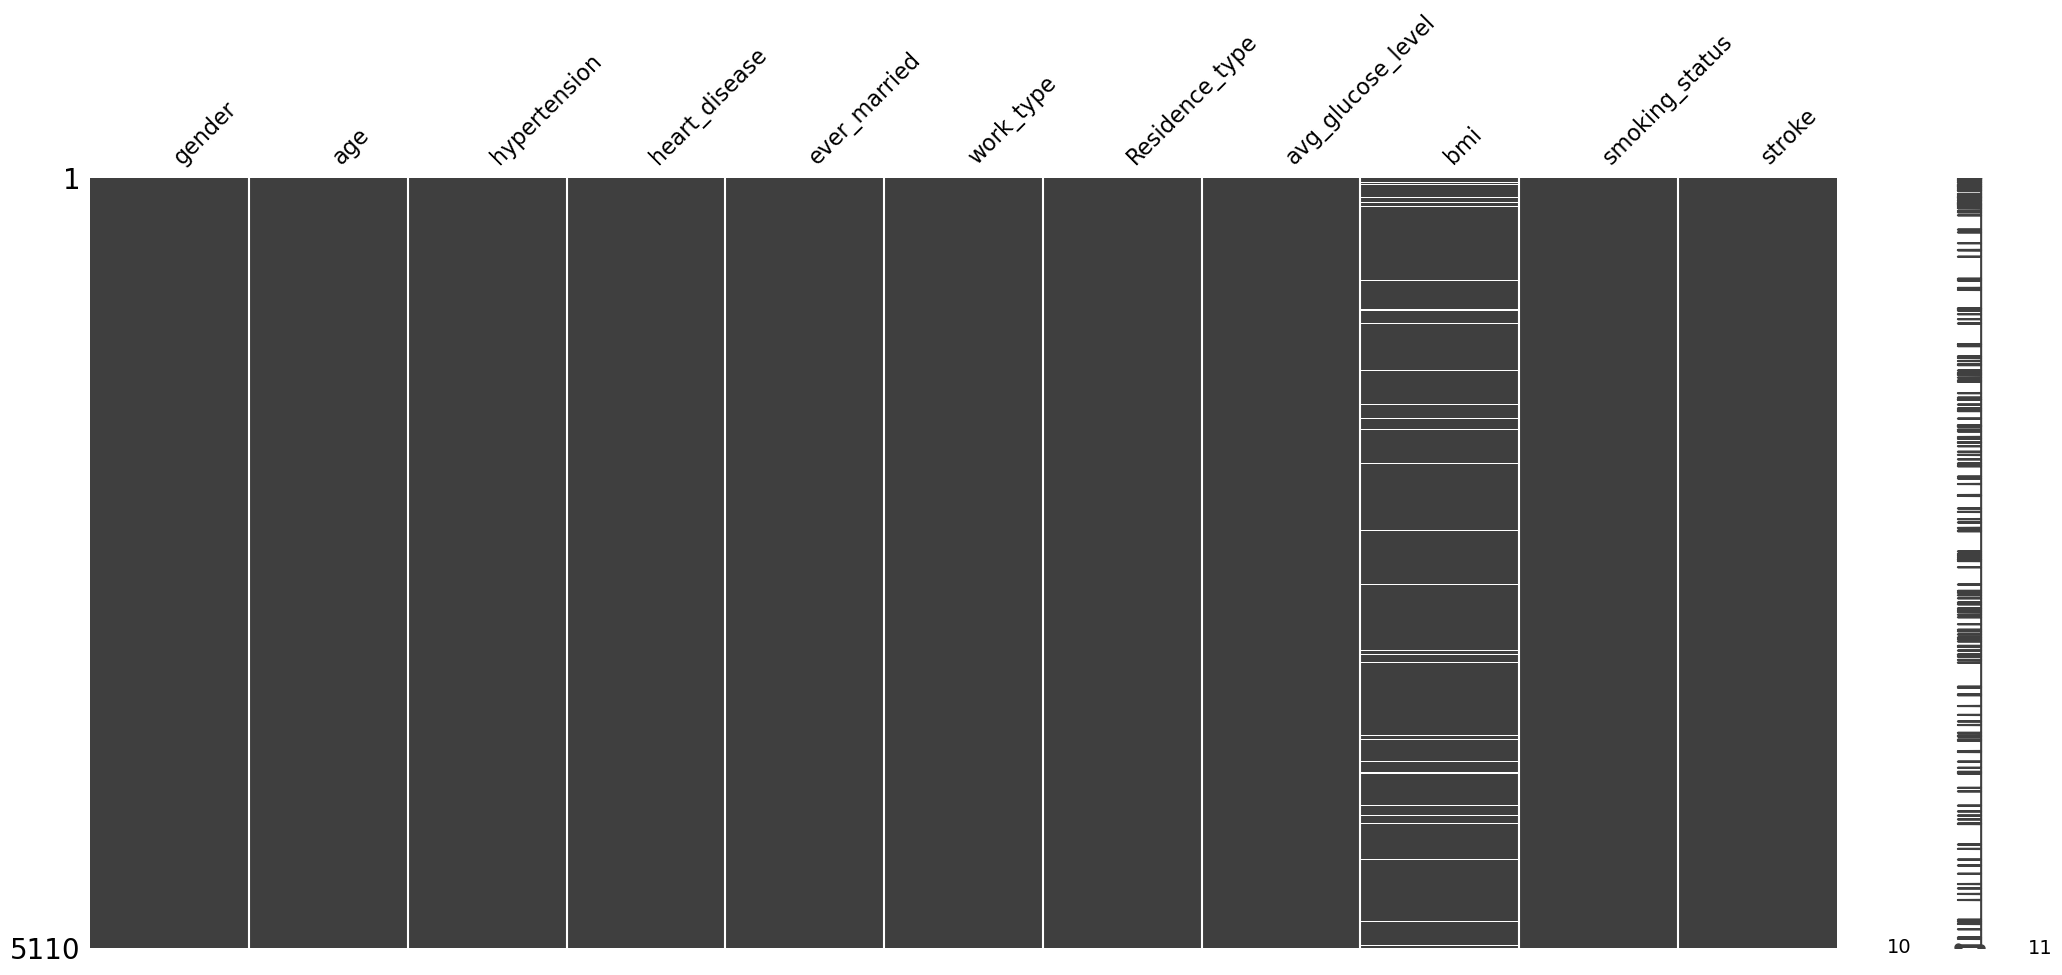

In [124]:
import missingno as msno
msno.matrix(dataset)
plt.show()

In [125]:
# Fill null values by mean of the bmi column
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean()) 
dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [126]:
dataset.duplicated().sum()

0

In [127]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [128]:
dataset.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [129]:
# Stroring all column names 
col=dataset.columns.tolist()

## Exploratory Data Analysis 

In [130]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

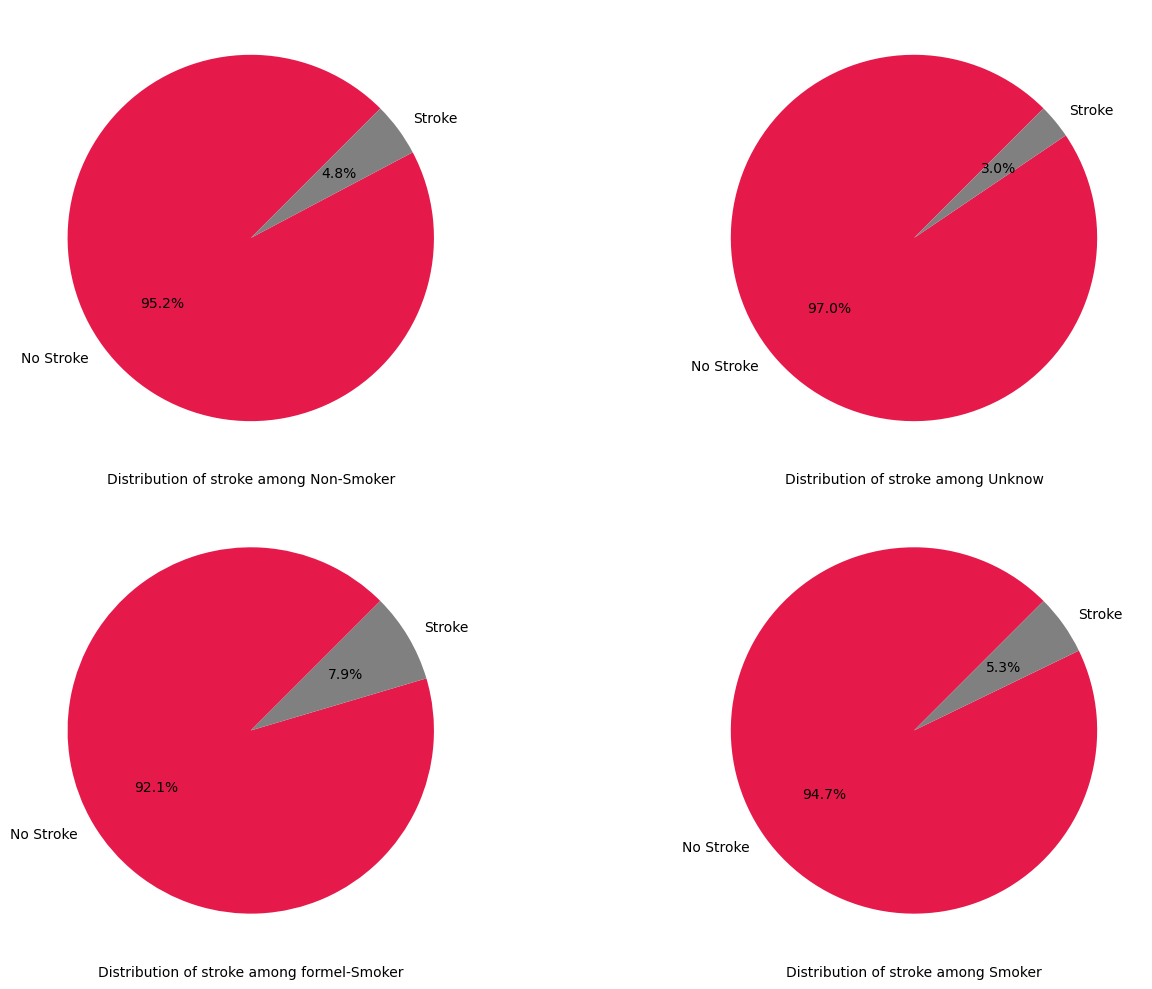

In [131]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

color1= ['#e6194b','gray']
ax[0,0].pie(x=dataset.loc[dataset['smoking_status']=='never smoked']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0,0].set_xlabel("Distribution of stroke among Non-Smoker")

ax[0,1].pie(x=dataset.loc[dataset['smoking_status']=='Unknown']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0,1].set_xlabel("Distribution of stroke among Unknow")

ax[1,0].pie(x=dataset.loc[dataset['smoking_status']=='formerly smoked']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1,0].set_xlabel("Distribution of stroke among formel-Smoker")
   
ax[1,1].pie(x=dataset.loc[dataset['smoking_status']=='smokes']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1,1].set_xlabel("Distribution of stroke among Smoker")
plt.tight_layout()
plt.show()

In [132]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Text(0.5, 0, 'Distribution of stroke among Female')

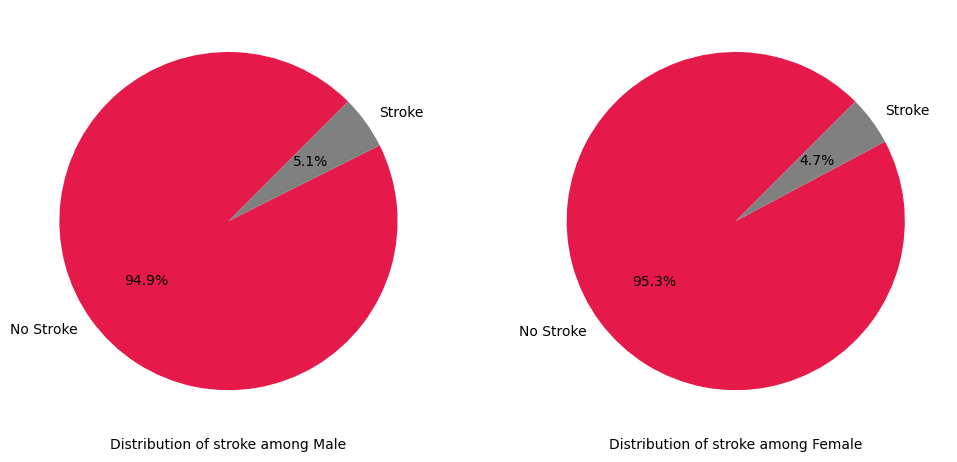

In [133]:
# Check the stroke rate in male and female 

fig,ax=plt.subplots(1,2,figsize=(12,8))

color1= ['#e6194b','gray']
ax[0].pie(x=dataset.loc[dataset['gender']=='Male']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_xlabel("Distribution of stroke among Male")

ax[1].pie(x=dataset.loc[dataset['gender']=='Female']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_xlabel("Distribution of stroke among Female")

In [134]:
dataset['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

Text(0.5, 0, 'Distribution of stroke with Hypertension')

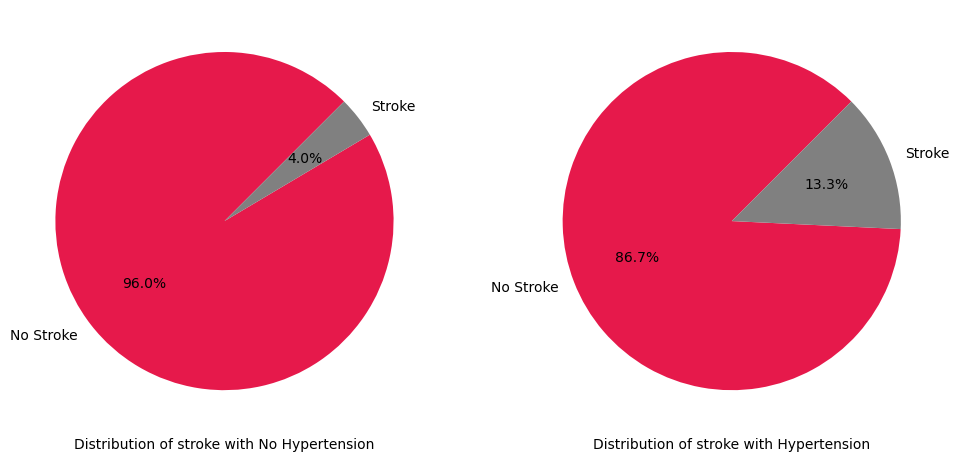

In [135]:
# Check for stroke rate compared to hypertension

fig,ax=plt.subplots(1,2,figsize=(12,8))

color1= ['#e6194b','gray']
ax[0].pie(x=dataset.loc[dataset['hypertension']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_xlabel("Distribution of stroke with No Hypertension")

ax[1].pie(x=dataset.loc[dataset['hypertension']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_xlabel("Distribution of stroke with Hypertension")

In [136]:
dataset['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

Text(0.5, 0, 'Distribution of stroke with heart_disease')

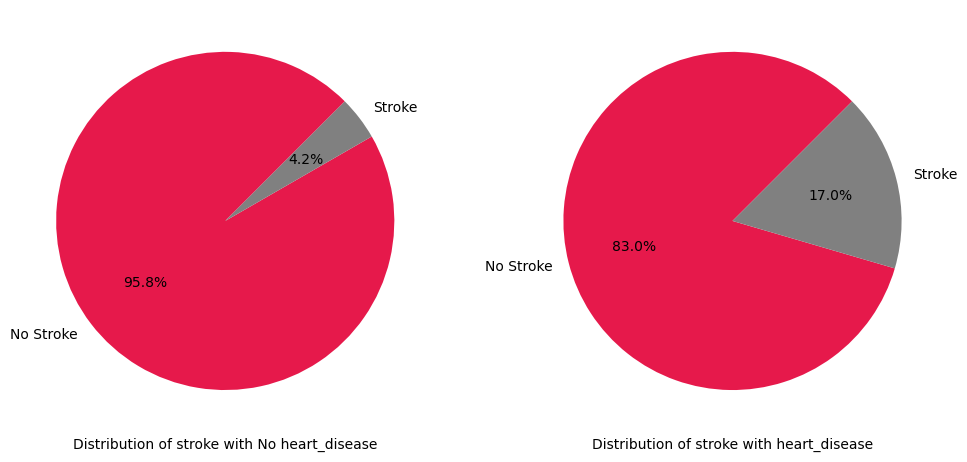

In [137]:
# Check for stroke rate compared to heart disease

fig,ax=plt.subplots(1,2,figsize=(12,8))

color1= ['#e6194b','gray']
ax[0].pie(x=dataset.loc[dataset['heart_disease']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_xlabel("Distribution of stroke with No heart_disease")

ax[1].pie(x=dataset.loc[dataset['heart_disease']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_xlabel("Distribution of stroke with heart_disease")

After observing above pie charts there no any pattern to detect the directly reason of heart stroke 

## Handling outliers 

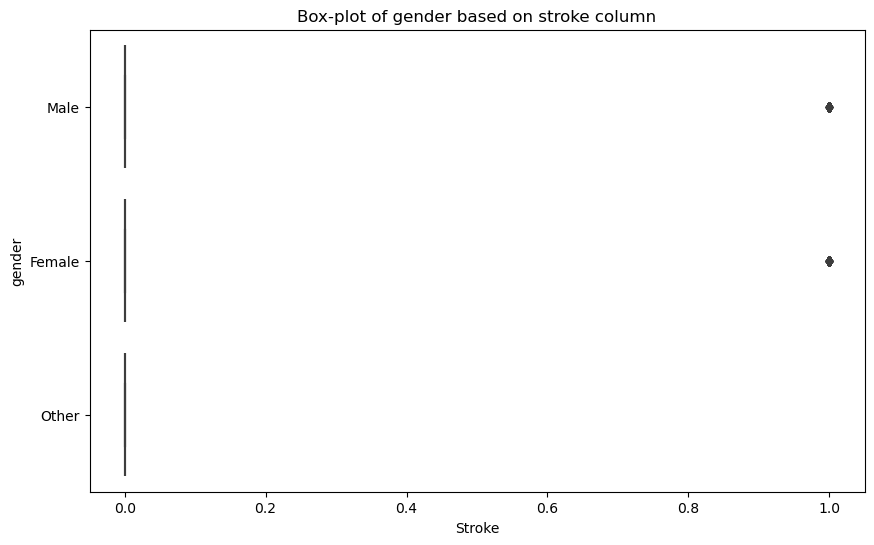

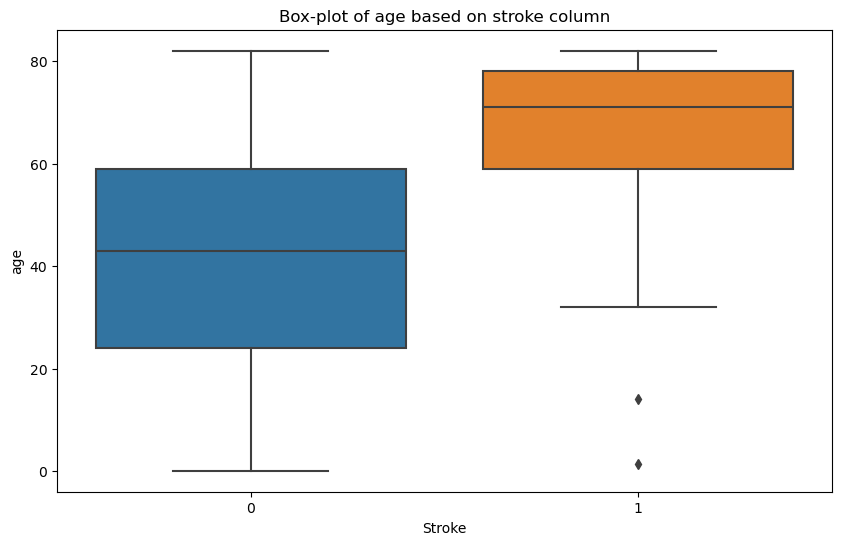

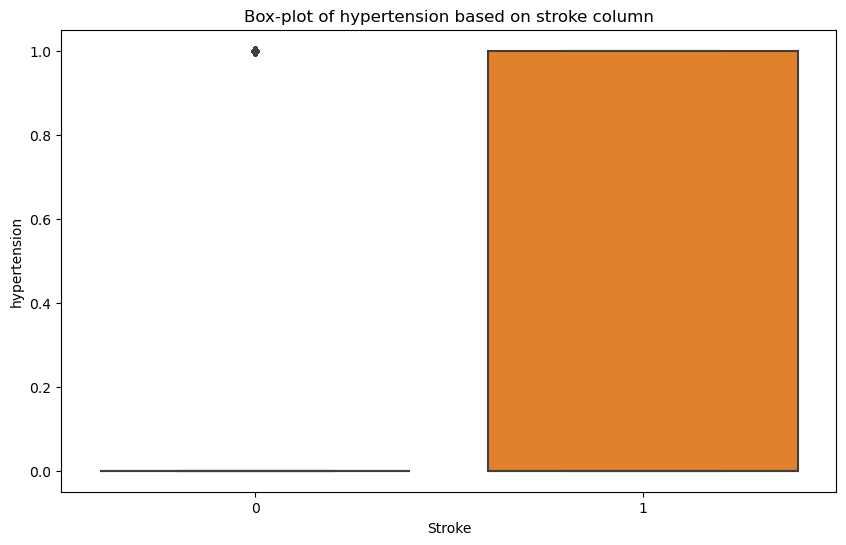

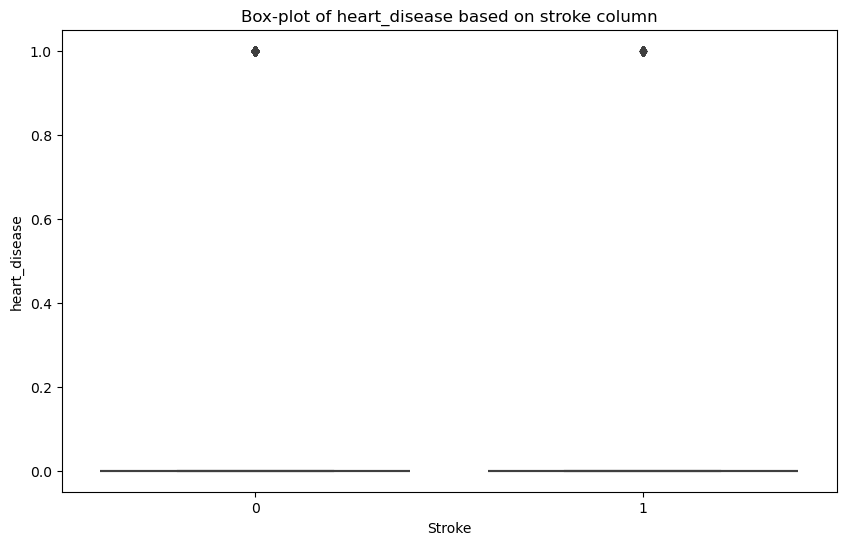

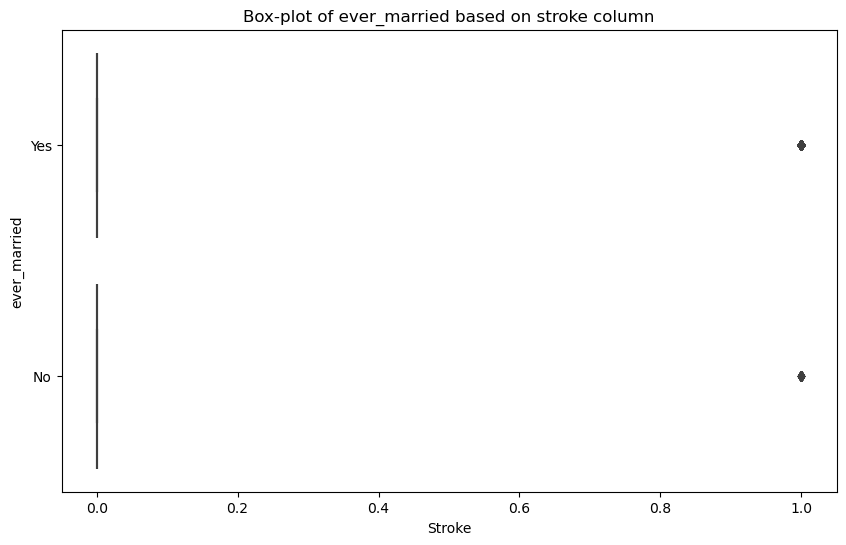

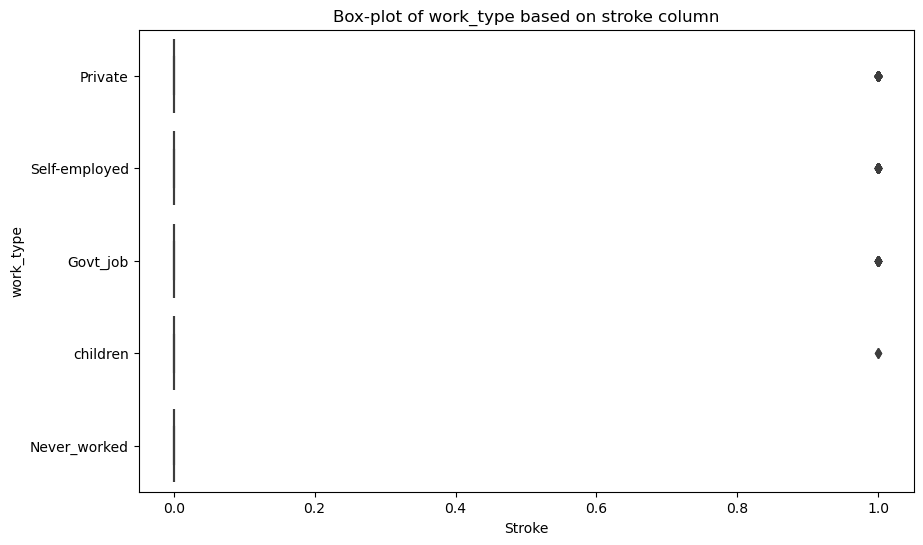

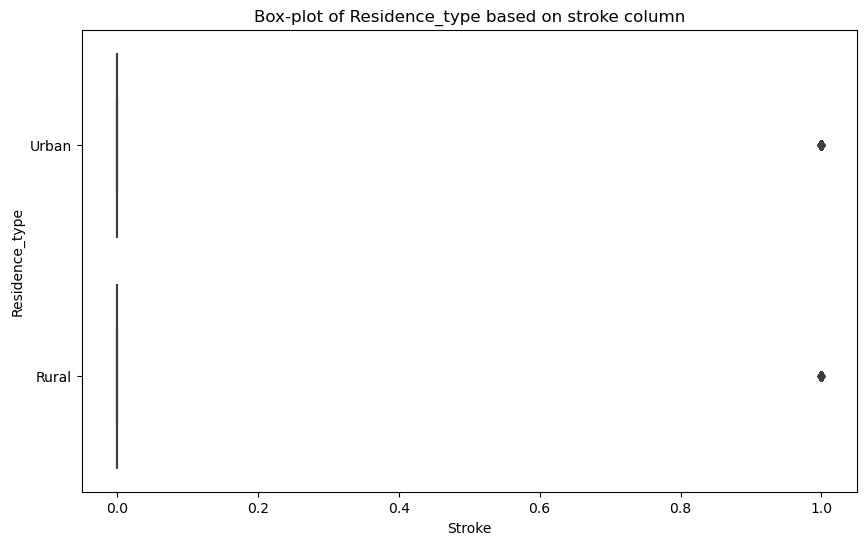

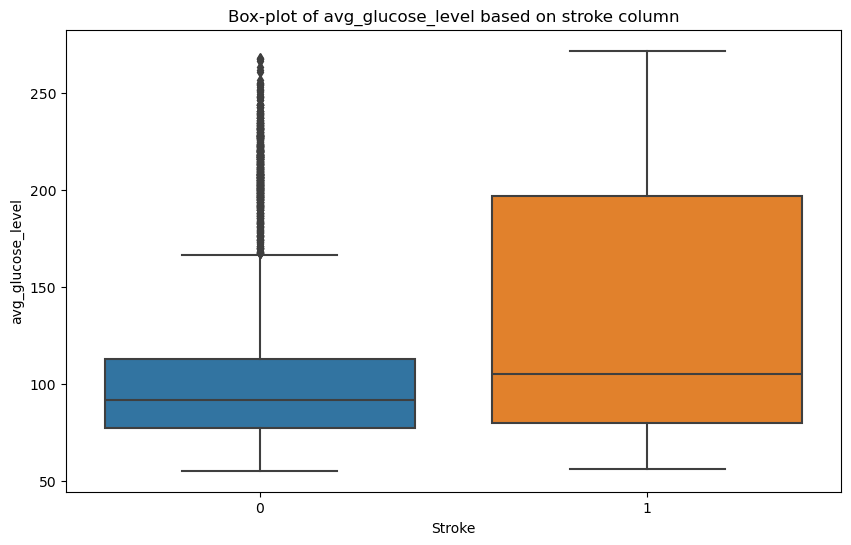

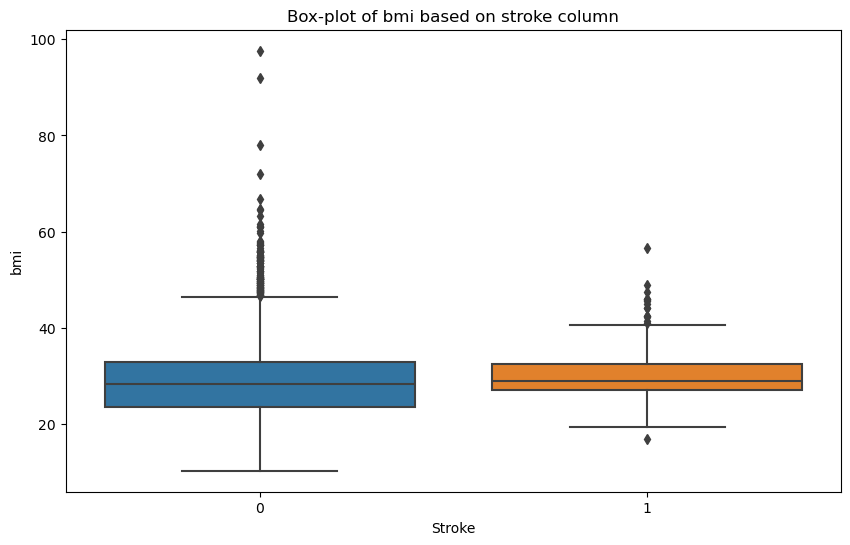

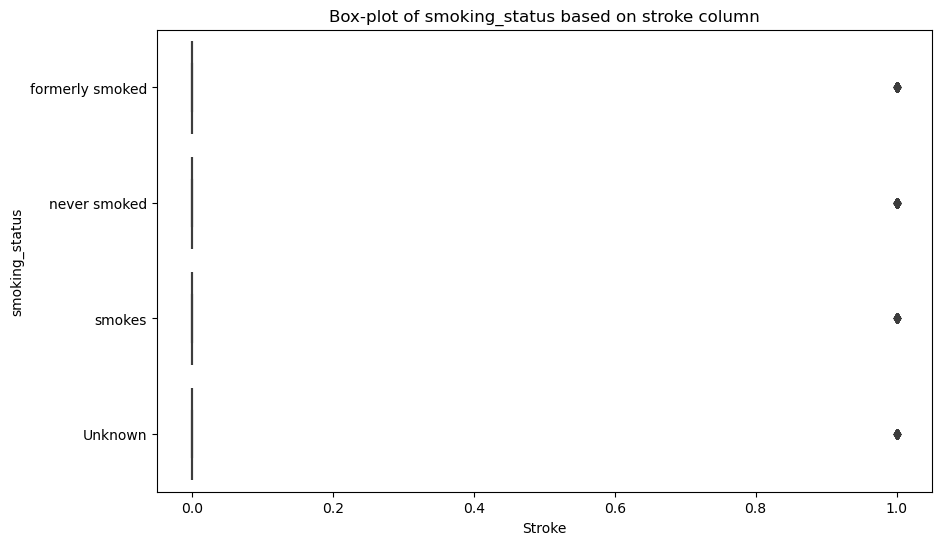

In [138]:
# Function to identify and plot outliers
def outlier_identification(col):
    if col != 'stroke':  # Skipping the 'stroke' column itself
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        # Plot a box plot to identify outliers in 'col' based on 'stroke' column
        sns.boxplot(x='stroke', y=col, data=dataset, ax=ax)
        ax.set_title(f'Box-plot of {col} based on stroke column')
        ax.set_xlabel('Stroke')
        ax.set_ylabel(col)
        plt.show()

# Iterate over each column name in the dataset
for col in dataset.columns:
    outlier_identification(col)
    

After observing above plots bmi and avg_glucose have some outliers in the data 

In [139]:
# Outlier handling 

def handling_outlier(col): 
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset[col] = np.where(dataset[col] < lower_bound, lower_bound, dataset[col])
    dataset[col] = np.where(dataset[col] > upper_bound, upper_bound, dataset[col])
    return dataset[col]

In [140]:
handling_outlier('bmi')

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

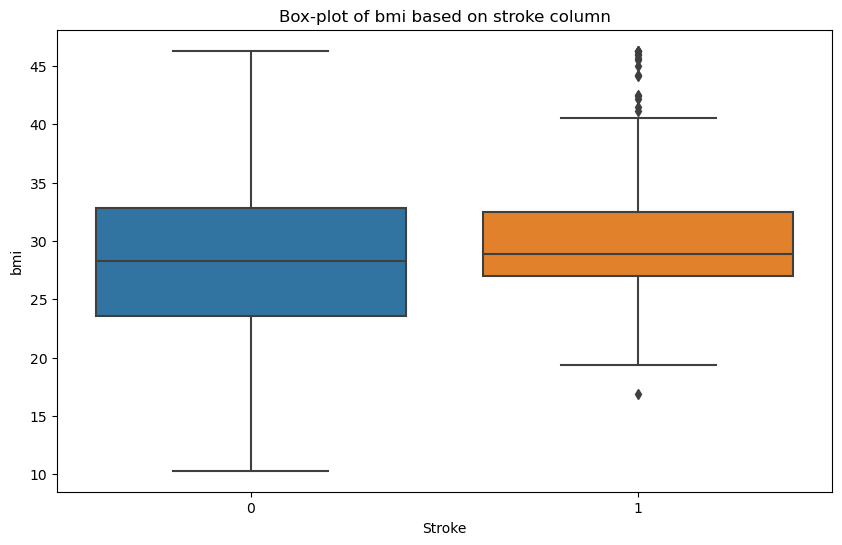

In [141]:
outlier_identification('bmi')

In [142]:
handling_outlier('avg_glucose_level')

0       169.3575
1       169.3575
2       105.9200
3       169.3575
4       169.3575
          ...   
5105     83.7500
5106    125.2000
5107     82.9900
5108    166.2900
5109     85.2800
Name: avg_glucose_level, Length: 5110, dtype: float64

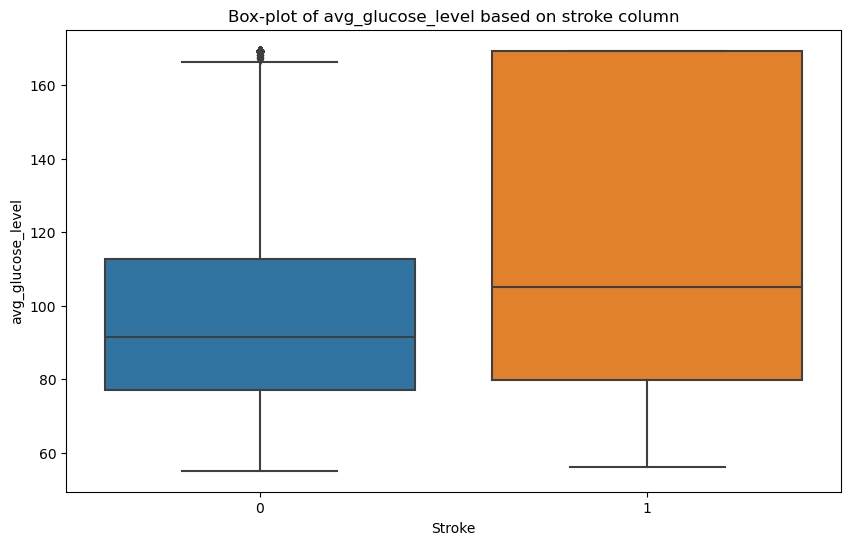

In [143]:
outlier_identification('avg_glucose_level')

In [144]:
# Check the gender tyepes and counts for each

dataset['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [145]:
dataset.drop(dataset.loc[dataset['gender']=='Other'].index,inplace=True) # droping 1 row
dataset['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [146]:
dataset.reset_index(drop=True,inplace=True)

In [147]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1


### Encoding for transformation of categorical columns into numerical

In [148]:
dataset_1=pd.get_dummies(dataset,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],
               drop_first=True)

In [149]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.893237,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.000000,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.600000,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.600000,formerly smoked,0


In [150]:
dataset_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   gender_Male                     5109 non-null   uint8  
 7   ever_married_Yes                5109 non-null   uint8  
 8   work_type_Never_worked          5109 non-null   uint8  
 9   work_type_Private               5109 non-null   uint8  
 10  work_type_Self-employed         5109 non-null   uint8  
 11  work_type_children              5109 non-null   uint8  
 12  Residence_type_Urban            51

<Axes: >

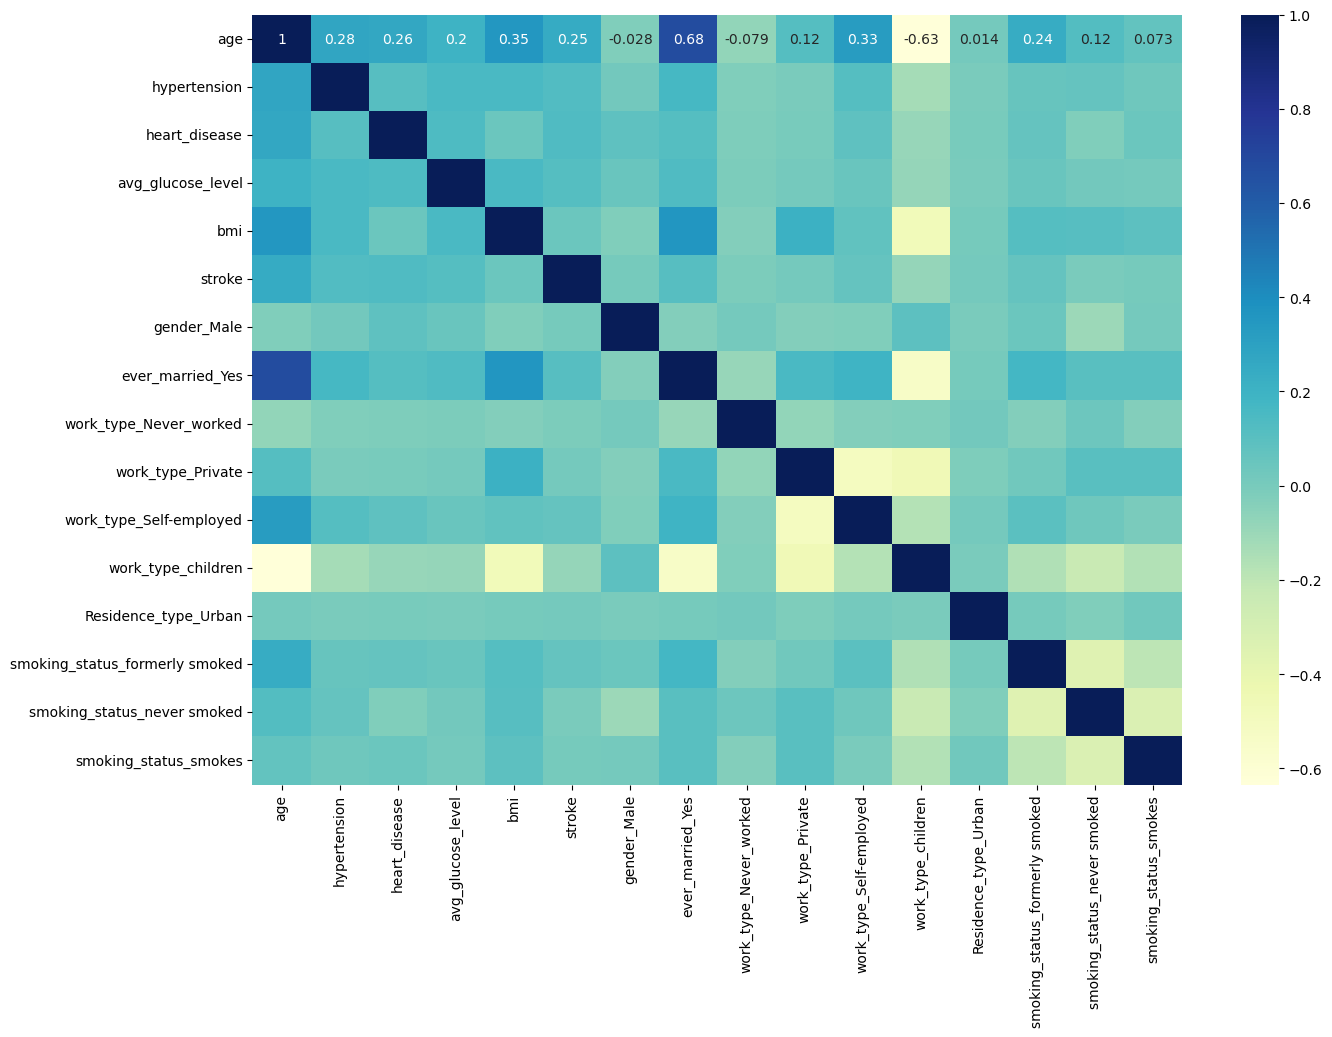

In [151]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dataset_1.corr(),annot=True,cmap='YlGnBu')

<Axes: >

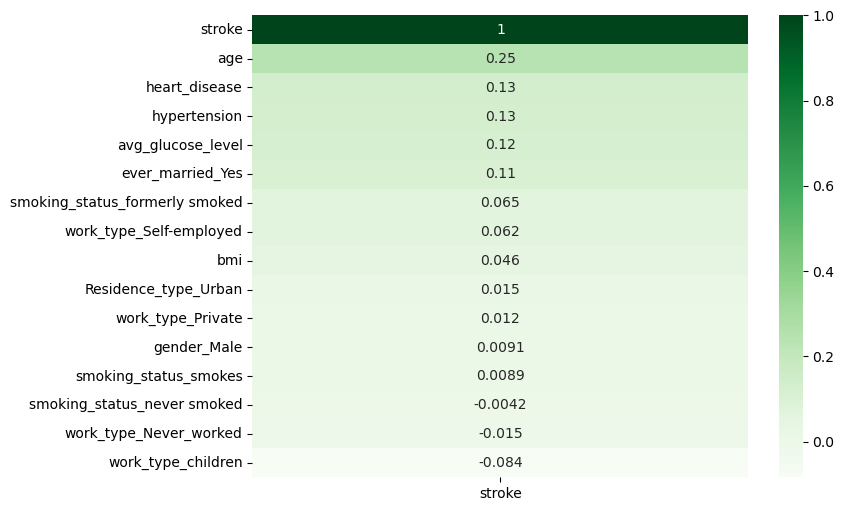

In [152]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset_1.corr()[['stroke']].sort_values(by='stroke',ascending=False),annot=True,cmap='Greens')

In [153]:
dataset_1.corr()[['stroke']]

,stroke
age,0.245239
hypertension,0.127891
heart_disease,0.134905
avg_glucose_level,0.115727
bmi,0.045729
stroke,1.000000
gender_Male,0.009081
ever_married_Yes,0.108299
work_type_Never_worked,-0.014885
work_type_Private,0.011927


# Handling Imbalance Data 

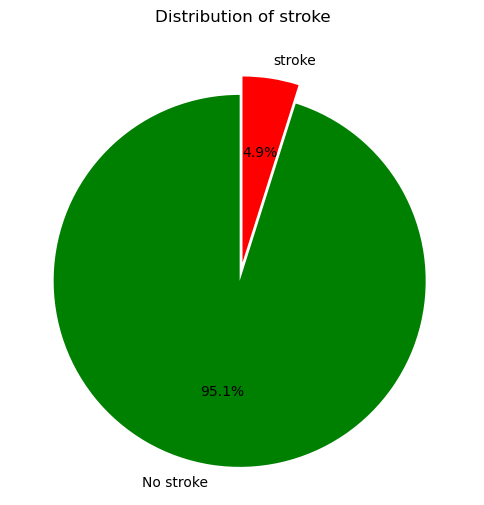

In [154]:
plt.figure(figsize=(6,8))
plt.pie(dataset_1['stroke'].value_counts(),
        labels=['No stroke','stroke'],
        explode=(.1,0),colors=['Green','red'],
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of stroke')
plt.show()

In [155]:
# ! pip install collection

In [156]:
# ! pip install imblearn

# Here the minority class has less count so we are using oversampling 

from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

X = dataset_1.drop(columns=['stroke'])
y = dataset_1['stroke']

ros = RandomOverSampler()

ros_train_x, ros_train_y = ros.fit_resample(X, y)

# After oversampling
print(f'Before resampled dataset shape: {Counter(y)}')
print(f'Resampled dataset shape: {Counter(ros_train_y   )}')

In [157]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)
X=dataset_1.loc[:,dataset_1.columns!='stroke']
y=dataset_1.loc[:,dataset_1.columns=='stroke']
x_sm,y_sm=sm.fit_resample(X,y)

In [158]:
y_sm

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
9715,1
9716,1
9717,1
9718,1


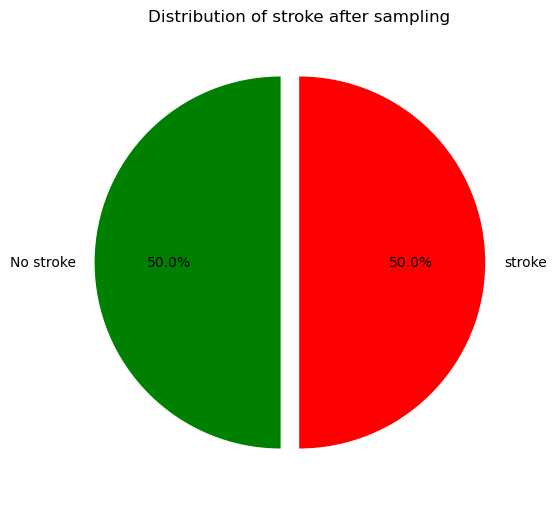

In [159]:
plt.figure(figsize=(6,8))
plt.pie(y_sm['stroke'].value_counts(),
        labels=['No stroke','stroke'],
        explode=(.1,0),colors=['Green','red'],
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of stroke after sampling')
plt.show()

In [160]:
x_sm

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.000000,0,1,169.357500,36.600000,1,1,0,1,0,0,1,1,0,0
1,61.000000,0,0,169.357500,28.893237,0,1,0,0,1,0,0,0,1,0
2,80.000000,0,1,105.920000,32.500000,1,1,0,1,0,0,0,0,1,0
3,49.000000,0,0,169.357500,34.400000,0,1,0,1,0,0,1,0,0,1
4,79.000000,1,0,169.357500,24.000000,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,77.957575,0,0,75.369213,28.898989,0,1,0,0,0,0,0,1,0,0
9716,78.691367,0,0,169.357500,24.864171,0,1,0,0,1,0,0,0,0,0
9717,70.609028,0,0,169.357500,38.778194,0,1,0,0,0,0,0,0,0,0
9718,80.000000,0,0,169.357500,31.660184,1,1,0,1,0,0,0,0,0,0


## Data Scaling 

We are scaling dataset are transformed to a common scale without distorting differences in the ranges of values., SVM. In this case we are using MinMax Scaling [Normalization]- This scales the data to a fixed range, usually [0, 1]. 

In [161]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [162]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

x_sm[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(x_sm[['age', 'avg_glucose_level', 'bmi']])


In [163]:
x_sm

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,1.000000,0.730556,1,1,0,1,0,0,1,1,0,0
1,0.743652,0,0,1.000000,0.516479,0,1,0,0,1,0,0,0,1,0
2,0.975586,0,1,0.444688,0.616667,1,1,0,1,0,0,0,0,1,0
3,0.597168,0,0,1.000000,0.669444,0,1,0,1,0,0,1,0,0,1
4,0.963379,1,0,1.000000,0.380556,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,0.950654,0,0,0.177255,0.516639,0,1,0,0,0,0,0,1,0,0
9716,0.959611,0,0,1.000000,0.404560,0,1,0,0,1,0,0,0,0,0
9717,0.860950,0,0,1.000000,0.791061,0,1,0,0,0,0,0,0,0,0
9718,0.975586,0,0,1.000000,0.593338,1,1,0,1,0,0,0,0,0,0


Split data into train and test for further modeling

In [164]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(7776, 15)
(1944, 15)


In [165]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7609,0.756092,0,0,0.472921,0.424102,0,1,0,0,0,0,0,0,0,0
1739,0.194336,0,0,0.295262,0.466667,0,0,0,0,1,0,1,0,0,0
2098,0.523926,0,0,0.180764,0.280556,0,1,0,0,1,0,1,1,0,0
8948,0.552554,0,0,1.000000,0.993713,0,1,0,0,0,0,0,0,0,0
2373,0.755859,1,0,0.168071,0.658333,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.997792,1,0,0.247369,0.466079,0,0,0,1,0,0,0,0,0,0
5191,0.755802,0,0,1.000000,0.554061,1,1,0,1,0,0,0,0,0,0
5390,0.701515,0,1,1.000000,0.554647,1,0,0,0,0,0,0,0,0,0
860,0.560547,0,0,0.394179,1.000000,0,1,0,1,0,0,0,0,0,1


## Model Implemnetation

In [166]:
# Import cross_val_score for evaluating model performance
from sklearn.model_selection import cross_val_score

# Metrics for evaluating model performance
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
# Models
    
from sklearn.ensemble import RandomForestClassifier  
import xgboost as xgb                                                 
import catboost as cb                              

# Feature Engineering
from sklearn.feature_selection import SequentialFeatureSelector  
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import RFE  
from sklearn.feature_selection import RFECV  
from sklearn.feature_selection import chi2  

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV  

import warnings  # Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)  

In [167]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 

In [168]:
rfc=RandomForestClassifier(verbose=0)
xgc=xgb.XGBClassifier()
cat=cb.CatBoostClassifier(verbose=0)
dtc = DecisionTreeClassifier(max_depth=5)
svm_clf = SVC(kernel="linear", C=10, decision_function_shape='ovr')
log_reg = LogisticRegression(penalty='none')
sgd_logreg = SGDClassifier(max_iter=100, penalty=None, eta0=0.01) 

In [169]:
# Create dictionary for all models 

models = {
        'rfc':rfc,
        'xgc':xgc,
        'cat':cat,
        'dtc':dtc,
        'svm_clf':svm_clf,
        'log_reg':log_reg,
        'sgd_logreg': sgd_logreg
}

feature_engineering={
    'xgc':xgc
}

In [170]:
# Definin train model and cross validation on K fold. 
def train_model (X, y, model):
    model_score = []

    for key, model_name in model.items():
        print(key)
        score = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy').mean()
        model_score.append(score)
        print(score)

    arr.append(model_score)

In [171]:
# Function to train and evaluate models using cross-validation
def training(X, y,models):
    store = [] 
    for key, model in models.items():
        print(key)  
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                
                score = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy').mean()
                store.append(score)  
                print(score)  
        except:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                
                score = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='r2').mean()
                store.append(score)  
                print(score)  

        print('-----------------------------------------')
    arr.append(store)


## Feature engineeing 

In [172]:
# To select specific features for impact from all columns 



Select best features from all 

In [173]:
X.shape

(5109, 15)

In [174]:

selector = SelectKBest(score_func=chi2, k=14).fit(X, y)
train_x = selector.transform(X)
feature_dataframe = pd.DataFrame({
    'Feature': list(X.columns),          # List of feature names from the original dataset
    'Score': selector.scores_,           # Chi-squared scores for each feature
    'Pvalue': selector.pvalues_          # P-values for each feature
})


In [175]:
feature_dataframe.sort_values(by='Score')

,Feature,Score,Pvalue
13,smoking_status_never smoked,0.055750,8.133436e-01
5,gender_Male,0.246877,6.192826e-01
8,work_type_Private,0.310847,5.771607e-01
14,smoking_status_smokes,0.343764,5.576648e-01
11,Residence_type_Urban,0.597112,4.396819e-01
7,work_type_Never_worked,1.127160,2.883818e-01
9,work_type_Self-employed,16.570851,4.686584e-05
12,smoking_status_formerly smoked,17.676894,2.617874e-05
4,bmi,18.852893,1.411968e-05
6,ever_married_Yes,20.595671,5.672425e-06


In [176]:
# Function to calculate the mean accuracy from cross-validation

def cross_val_mean_acc(model, X, y):
    acc_kbest = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return acc_kbest.mean()

# Function to create a DataFrame from cross-validation accuracy scores

def create_datafram(arr_acc, model_dict):
    
    new = pd.DataFrame(columns=['Algorithm', 'Cv_mean_acc'])
    i = 0  
    
    # Iterate over the model dictionary to populate the DataFrame
    for key, name in model_dict.items():
        new.loc[i, 'Algorithm'] = key          
        new.loc[i, 'Cv_mean_acc'] = arr_acc[i] 
        i += 1  
    return new



# Function to create a DataFrame of model accuracies using cross-validation

def model_acc_df(selected_algo, X, y):
    model_acc_arr = []  

    # Iterate over the selected algorithms
    for key, model in selected_algo.items():
        # Calculate the mean accuracy using cross-validation and add to the list
        model_acc_arr.append(cross_val_mean_acc(model, X, y))

    # Create a DataFrame with the accuracies and algorithm names
    acc_df = create_datafram(model_acc_arr, selected_algo)
    return acc_df  


In [177]:
model_acc_df_for_SelectKBest=model_acc_df(models,train_x,y)

c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

In [178]:
model_acc_df_for_SelectKBest

,Algorithm,Cv_mean_acc
0,rfc,0.949305
1,xgc,0.94265
2,cat,0.94774
3,dtc,0.945389
4,svm_clf,0.951263
5,log_reg,0.951067
6,sgd_logreg,0.946562


In [179]:
def model_acc_bar_plot(df,y_lower,y_upper):
    plt.figure(figsize=(8,6))
    ax = sns.barplot(x=df.loc[:,df.columns[0]], y=df.loc[:,df.columns[1]])

    # Add percentage labels on top of each bar
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height() * 100), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.xlabel('Classifier Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of different models')
    plt.xticks(rotation=45)
    plt.ylim(y_lower,y_upper)
    plt.show()
    

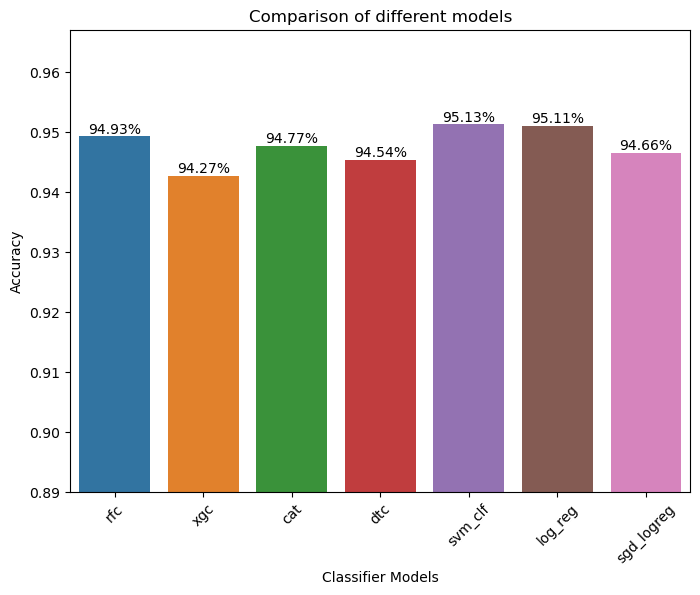

In [180]:
# Model accuracy bar plot for SelectKBest
model_acc_bar_plot(model_acc_df_for_SelectKBest,.89,.967)

## Hyperparameter-Tuning

* Xgboost
* Random Forest
* Catboost 
* Decission Tree Classifier
* SVM
* Logistic Regression
* SGD Log Reg 


In [181]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7609,0.756092,0,0,0.472921,0.424102,0,1,0,0,0,0,0,0,0,0
1739,0.194336,0,0,0.295262,0.466667,0,0,0,0,1,0,1,0,0,0
2098,0.523926,0,0,0.180764,0.280556,0,1,0,0,1,0,1,1,0,0
8948,0.552554,0,0,1.000000,0.993713,0,1,0,0,0,0,0,0,0,0
2373,0.755859,1,0,0.168071,0.658333,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.997792,1,0,0.247369,0.466079,0,0,0,1,0,0,0,0,0,0
5191,0.755802,0,0,1.000000,0.554061,1,1,0,1,0,0,0,0,0,0
5390,0.701515,0,1,1.000000,0.554647,1,0,0,0,0,0,0,0,0,0
860,0.560547,0,0,0.394179,1.000000,0,1,0,1,0,0,0,0,0,1


### Grid Search for SVM model 

In [200]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import random
from sklearn.pipeline import Pipeline

param_distribs = {
        'C': randint(low=5, high=50),
        'gamma': uniform(0.1, 0.5),    
    }


rbf_svm = SVC(kernel="rbf", decision_function_shape='ovr')

rbf_search = RandomizedSearchCV(rbf_svm, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='accuracy', random_state=42)


rbf_search.fit(x_train, y_train)

c:\Users\salun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FDC6CA3D0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021FDCE74510>},
                   random_state=42, scoring='accuracy')

In [194]:
cvres = rbf_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9062500929913456 {'C': 43, 'gamma': 0.49827149343011645}
0.9017498078178857 {'C': 19, 'gamma': 0.4659969709057026}
0.8960908091486953 {'C': 25, 'gamma': 0.17800932022121826}
0.8926188016101969 {'C': 23, 'gamma': 0.14998745790900145}
0.9009780209788476 {'C': 15, 'gamma': 0.5330880728874676}


In [195]:
rbf_search.best_params_

{'C': 43, 'gamma': 0.49827149343011645}

In [196]:
rbf_search.best_estimator_

SVC(C=43, gamma=0.49827149343011645)

In [197]:
rbf_search.best_score_

0.9062500929913456

### Grid Search for Logistic regression

In [202]:
# Create a pipeline with MinMaxScaler and LogisticRegression
# Define the parameter grid for GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'logistic__C': [0.1, 1, 10, 100],  # Regularization parameter
    'logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'logistic__solver': ['liblinear', 'saga'],  # Solver
}

# Create a pipeline with MinMaxScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\salun\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\salun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 1, 10, 100],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet',
                                               'none'],
                         'logistic__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [203]:
cvres = rbf_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9062500929913456 {'C': 43, 'gamma': 0.49827149343011645}
0.9017498078178857 {'C': 19, 'gamma': 0.4659969709057026}
0.8960908091486953 {'C': 25, 'gamma': 0.17800932022121826}
0.8926188016101969 {'C': 23, 'gamma': 0.14998745790900145}
0.9009780209788476 {'C': 15, 'gamma': 0.5330880728874676}


In [204]:
grid_search.best_score_

0.8623977715140645

In [205]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=1, max_iter=1000, solver='saga'))])

In [206]:
grid_search.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}

### Grid Search for Random Forest classifier model 

In [207]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {'max_depth': randint(low=5, high=20), 
              'min_samples_leaf': randint(low=5, high=20)}

tree_gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, 
                             n_iter=15, cv=5, verbose=1,
                             scoring='accuracy',
                             return_train_score=True)

tree_gs.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FE6356F10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FE6338890>},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [208]:
cvres = tree_gs.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9219389315501036 {'max_depth': 15, 'min_samples_leaf': 5}
0.8753857281015713 {'max_depth': 7, 'min_samples_leaf': 15}
0.8900462063663943 {'max_depth': 12, 'min_samples_leaf': 17}
0.8899177543209978 {'max_depth': 11, 'min_samples_leaf': 17}
0.9079217054199489 {'max_depth': 19, 'min_samples_leaf': 9}
0.8909466105687764 {'max_depth': 14, 'min_samples_leaf': 17}
0.9171809983550865 {'max_depth': 15, 'min_samples_leaf': 6}
0.897376900123162 {'max_depth': 9, 'min_samples_leaf': 9}
0.9034202630208548 {'max_depth': 15, 'min_samples_leaf': 11}
0.8996914340505378 {'max_depth': 18, 'min_samples_leaf': 12}
0.8969909653741558 {'max_depth': 15, 'min_samples_leaf': 13}
0.889146380776829 {'max_depth': 12, 'min_samples_leaf': 18}
0.8967330693756768 {'max_depth': 17, 'min_samples_leaf': 14}
0.9138372775440367 {'max_depth': 14, 'min_samples_leaf': 7}
0.9167951462650542 {'max_depth': 11, 'min_samples_leaf': 5}


In [209]:
tree_gs.best_params_

{'max_depth': 15, 'min_samples_leaf': 5}

In [210]:
tree_gs.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=5)

In [211]:
tree_gs.best_score_

0.9219389315501036

### Grid Search for Catboost model 

In [222]:
# Define the parameter grid for GridSearchCV
from catboost import CatBoostClassifier
param_grid = {
    'catboost__depth': [4, 6, 8],  # Ensure values are in a list
    'catboost__learning_rate': [0.01, 0.1, 0.2],  # Ensure values are in a list
    'catboost__iterations': [100, 200, 300]  # Ensure values are in a list
}

# Create a pipeline with MinMaxScaler and CatBoostClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('catboost', CatBoostClassifier(verbose=0))
])

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x0000021FE655EF50>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [4, 6, 8],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy', verbose=1)

In [224]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8221435951694096 {'catboost__depth': 4, 'catboost__iterations': 100, 'catboost__learning_rate': 0.01}
0.8906892105241406 {'catboost__depth': 4, 'catboost__iterations': 100, 'catboost__learning_rate': 0.1}
0.9047064366542955 {'catboost__depth': 4, 'catboost__iterations': 100, 'catboost__learning_rate': 0.2}
0.8540378082146489 {'catboost__depth': 4, 'catboost__iterations': 200, 'catboost__learning_rate': 0.01}
0.9239963960687392 {'catboost__depth': 4, 'catboost__iterations': 200, 'catboost__learning_rate': 0.1}
0.940715330759884 {'catboost__depth': 4, 'catboost__iterations': 200, 'catboost__learning_rate': 0.2}
0.8631680704915728 {'catboost__depth': 4, 'catboost__iterations': 300, 'catboost__learning_rate': 0.01}
0.9345422759321865 {'catboost__depth': 4, 'catboost__iterations': 300, 'catboost__learning_rate': 0.1}
0.9470163416791344 {'catboost__depth': 4, 'catboost__iterations': 300, 'catboost__learning_rate': 0.2}
0.8508230354028384 {'catboost__depth': 6, 'catboost__iterations': 100, 

In [225]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x0000021FE616C6D0>)])

In [226]:
grid_search.best_params_

{'catboost__depth': 8,
 'catboost__iterations': 300,
 'catboost__learning_rate': 0.2}

In [227]:
grid_search.best_score_

0.9531889832119624

## Training models with best parameters

In [228]:
svc_best = SVC(  C=43,
            gamma=0.49827149343011645,
            kernel='rbf',  # 'rbf' was the kernel used during the search
            random_state=42)

log_reg = LogisticRegression(
    
)

logistic_best = LogisticRegression(C=1,
                                   penalty='l2',
                                   solver='saga',
                                   random_state=42)

cat_best =cb.CatBoostClassifier(bootstrap_type= 'MVS',
                             depth= 8,
                             grow_policy= 'Depthwise',
                             verbose=0,
                             iterations= 200,
                             l2_leaf_reg= 1,
                             learning_rate= 0.1)

rfc_best = RandomForestClassifier(max_depth=15,
                                  min_samples_leaf=5,
                                  random_state=42)


In [229]:
accuracy_data=pd.DataFrame(columns=['Algorithm','Accuracy'])
algo=[rfc_best,cat_best,svc_best,logistic_best]
model_name=['RandomForest','CatBoost', 'SVC', 'LogisticRegression']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    y_pred=algo[i].predict(x_test)
    accuracy_data.loc[i,'Algorithm']=model_name[i]
    accuracy_data.loc[i,'Accuracy']=accuracy_score(y_test,y_pred)

C:\Users\salun\AppData\Local\Temp\ipykernel_40132\821262393.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo[i].fit(x_train,y_train)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salun\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [230]:
# Final models accuracy DataFrame
accuracy_data

,Algorithm,Accuracy
0,RandomForest,0.939335
1,CatBoost,0.934442
2,SVC,0.937378
3,LogisticRegression,0.939335


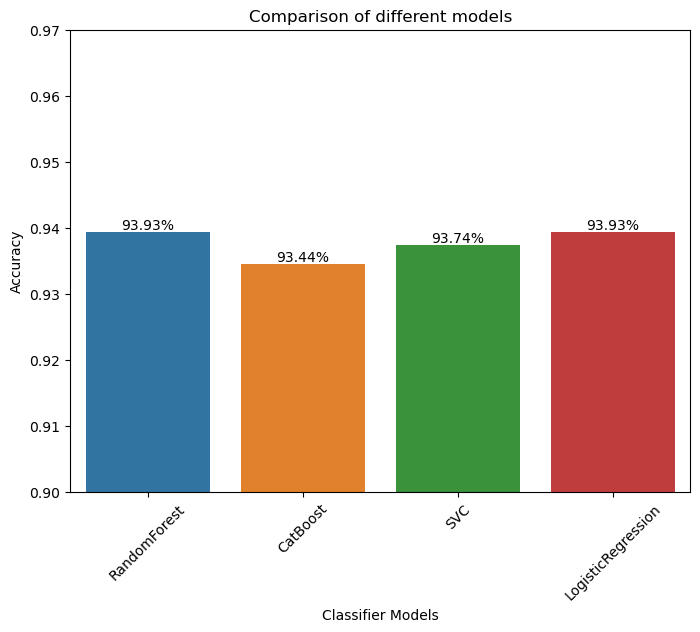

In [231]:
model_acc_bar_plot(accuracy_data,.90,.97)